In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_intrusion
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext snakeviz

Cannot import Surfe


In [2]:
data, bb = load_intrusion()

In [3]:
fault_data = data[data['type']=='fault']

In [4]:
fault_data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
1,300.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
2,600.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
3,900.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
4,1200.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
5,1500.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
6,1800.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
7,2100.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
8,2400.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN
9,2700.0,5500.0,0.0,0.0,0.0,fault,NaN,NaN,NaN


In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(fault_data)
fault = model.create_and_add_fault('fault',
                                   0,
                                   nelements=2000,
                                   steps=4,
                                   interpolatortype='PLI',
                                  buffer=0.3
                                  )


In [6]:
bedding_val = np.random.random((40,4))
bedding_val[:,0]*=bb[1,0]
bedding_val[:,1]*=bb[1,1]
bedding_val[:,2]=-200
bedding_val[:,3]=0
bedding_val = np.vstack([bedding_val,bedding_val])
bedding_val[40:,2]= -100
bedding_val[40:,3]= -1
# print(bedding_val)
# print(fault['feature'].evaluate(model.scale(bedding_val)))
bedding_val[fault['feature'].evaluate(model.scale(bedding_val[:,:3])),2]=-.1

# print(bedding_val)

In [7]:
# viewer = LavaVuModelViewer(model)
# viewer.add_isosurface(fault['feature'],isovalue=0)
# viewer.add_points(model.scale(bedding_val),name='points',pointsize=5)
# viewer.interactive()

In [8]:
# %%snakeviz
# for i in range(10):
#     model = GeologicalModel(bb[0,:],bb[1,:])
#     model.set_model_data(data)
#     fault = model.create_and_add_fault('fault',
#                                        -1000,
#                                        nelements=2000,
#                                        steps=4,
#                                        interpolatortype='PLI',
#                                       buffer=0.3,
#                                        solver='pyamg'
#                                       )
#     strati = model.create_and_add_foliation('strati',
#                                             nelements=10000,
#                                             interpolatortype='PLI',
#                                             cgw=0.1,
#                                             solver='pyamg',
#                                             buffer=0.5
#                                            )

#     viewer = LavaVuModelViewer(model)
#     viewer.add_isosurface(strati['feature'],isovalue=0)
#     viewer.add_isosurface(fault['feature'],isovalue=0)

#     viewer.add_data(strati['feature'])
#     viewer.interactive()

In [9]:
new_data = pd.DataFrame(bedding_val,columns=['X','Y','Z','val'])
new_data['type'] = 'strati'
# new_data['val'] = 0

In [10]:
# normal_vec = pd.DataFrame([[9000,10,10,0,0,1]],columns=['X','Y','Z','nx','ny','nz'])
# normal_vec['type'] = 'strati'

data = pd.concat([fault_data,new_data],sort=False)
data

,X,Y,Z,val,coord,type,nx,ny,nz
0,0.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
1,300.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
2,600.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
3,900.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
4,1200.000000,5500.000000,0.0,0.0,0.0,fault,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
75,6725.256167,3542.235256,-0.1,-1.0,NaN,strati,NaN,NaN,NaN
76,8754.602345,2772.598250,-0.1,-1.0,NaN,strati,NaN,NaN,NaN
77,526.379958,4240.623627,-0.1,-1.0,NaN,strati,NaN,NaN,NaN
78,800.995514,6126.847366,-100.0,-1.0,NaN,strati,NaN,NaN,NaN


In [11]:
bb

array([[    0.,     0., -4500.],
       [10000., 10000.,   500.]])

displacement: -1000
9.419008347158767



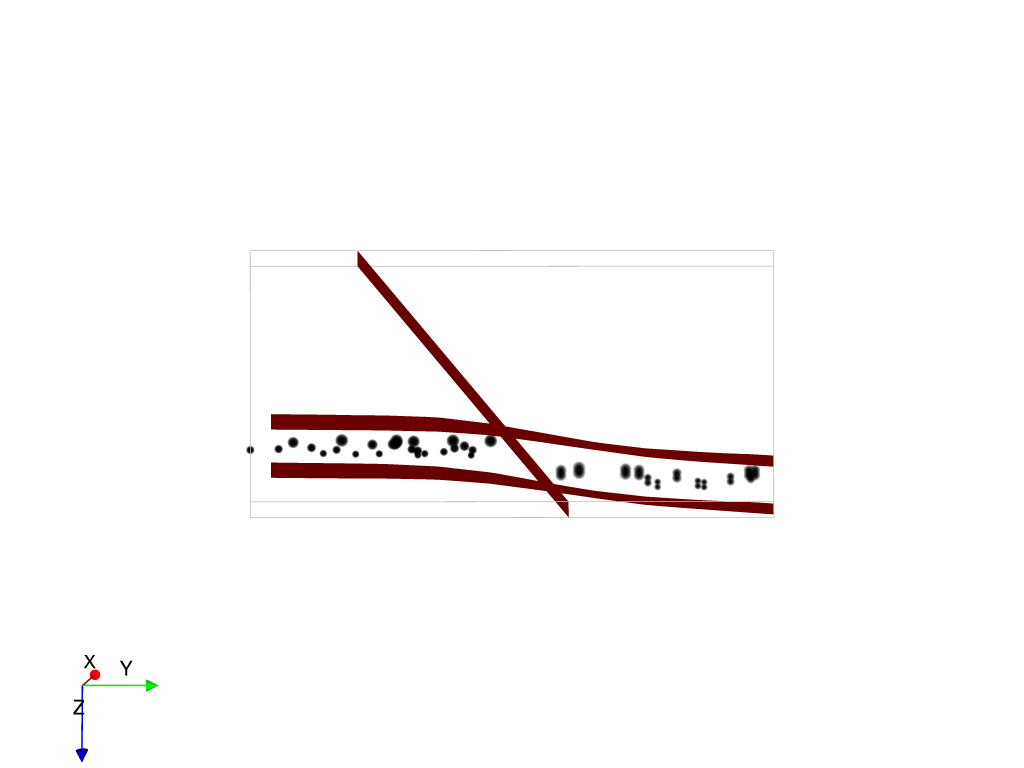

displacement: -500
4.173965753658107



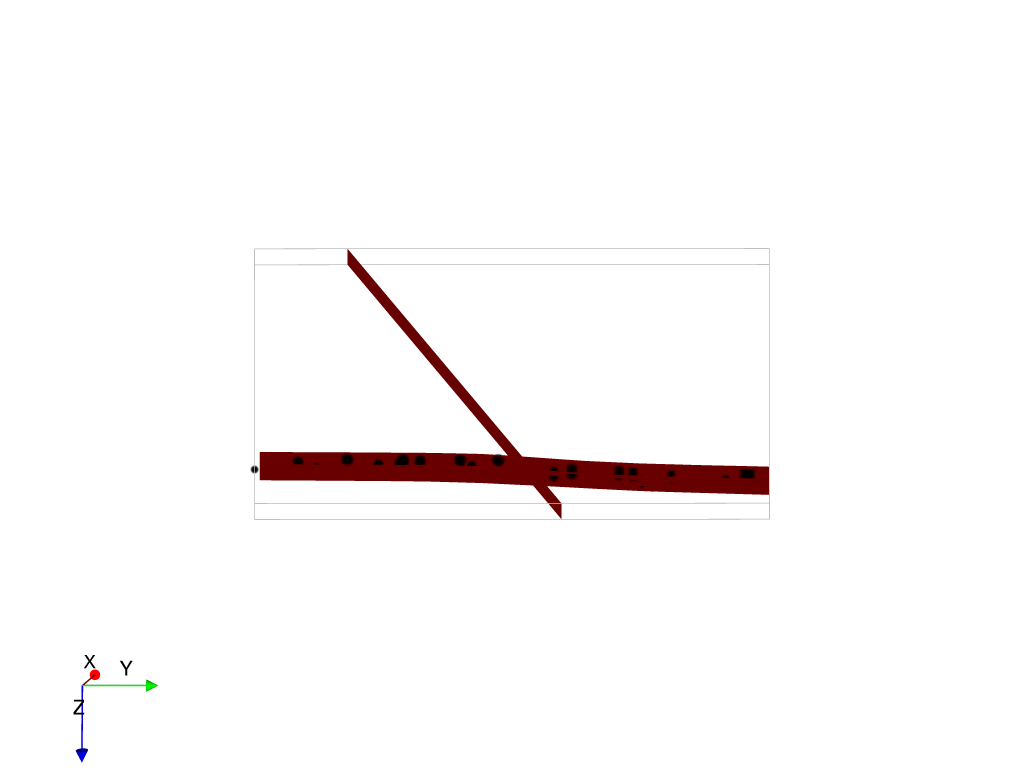

displacement: 0
1.0098192218119086



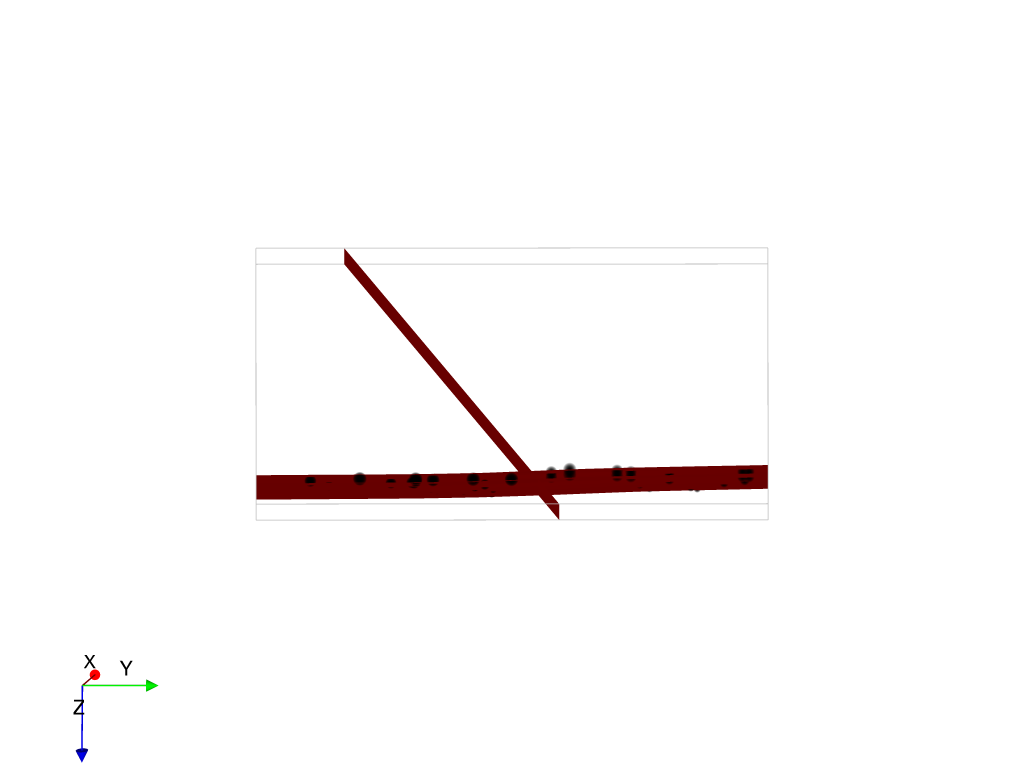

displacement: 500
6.362407329515645



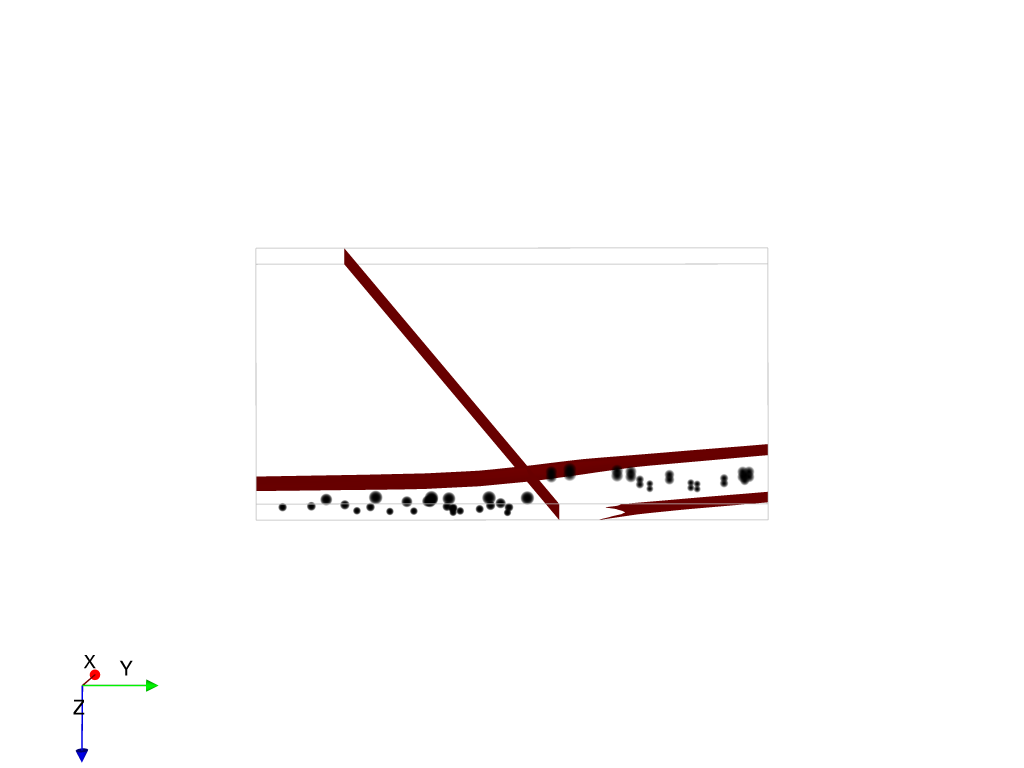

displacement: 1000
16.844589686071807


Isovalue doesn't exist inside bounding box



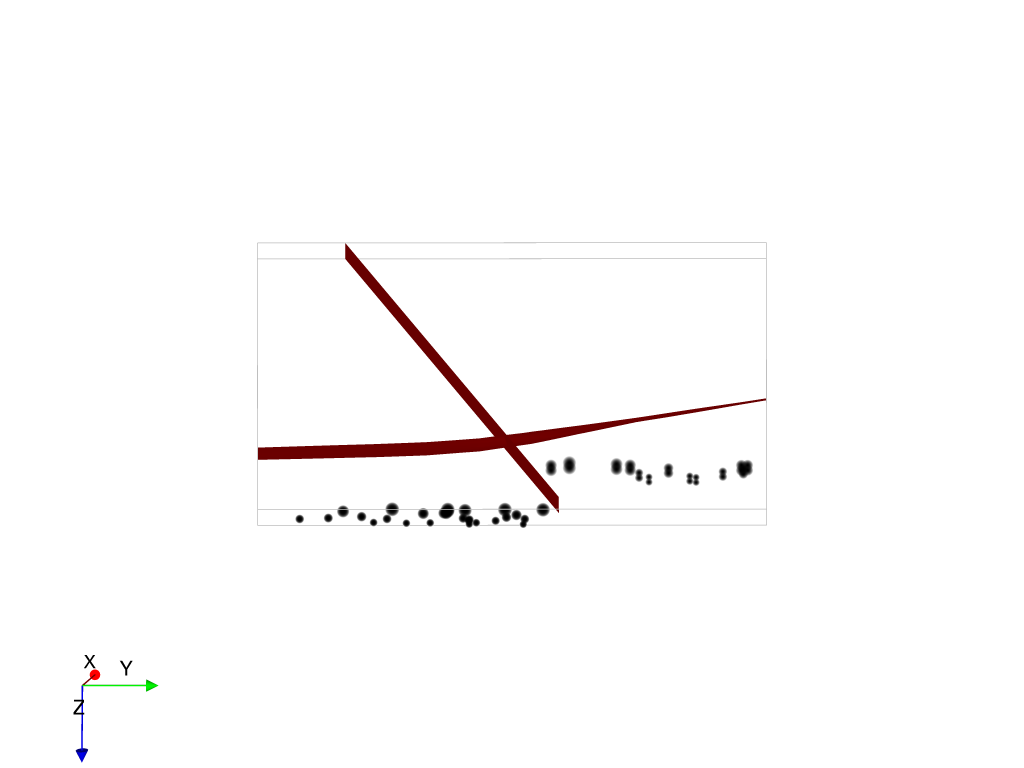

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
model = GeologicalModel(bb[0,:],bb[1,:],reuse_supports=True)
model.set_model_data(data)
displacement = -700
for displacement in [-1000,-500,0,500,1000]:
    print("displacement: {}".format(displacement))
    fault = model.create_and_add_fault('fault',
                                       displacement,
                                       nelements=2000,
                                       steps=4,
                                       interpolatortype='PLI',
                                      buffer=0.3,
                                       solver='lu'
                                      )
    strati = model.create_and_add_foliation('strati',
                                            nelements=10000,
                                            interpolatortype='PLI',
                                            cgw=0.1,
                                            solver='lu',
                                            buffer=0.5
                                           )
    plt.figure()
    print(np.sum(np.abs(strati['feature'].evaluate_value_misfit())))

    viewer = LavaVuModelViewer(model)
    strati['feature'].faults_enabled = False#toggle_faults()
    viewer.add_isosurface(strati['feature'],slices=[-1,0])
    viewer.add_isosurface(fault['feature'][0],isovalue=0)
    #viewer.add_data(strati['feature'])
    viewer.add_points(strati['feature'].get_interpolator().get_value_constraints()[:,:3],name='points',pointsize=10)
    viewer.rotate([0.019632680341601372, 88.20027923583984, -89.94925689697266])#lv.rotatex(90)
    #viewer.lv.rotatey(90)
    viewer.display()


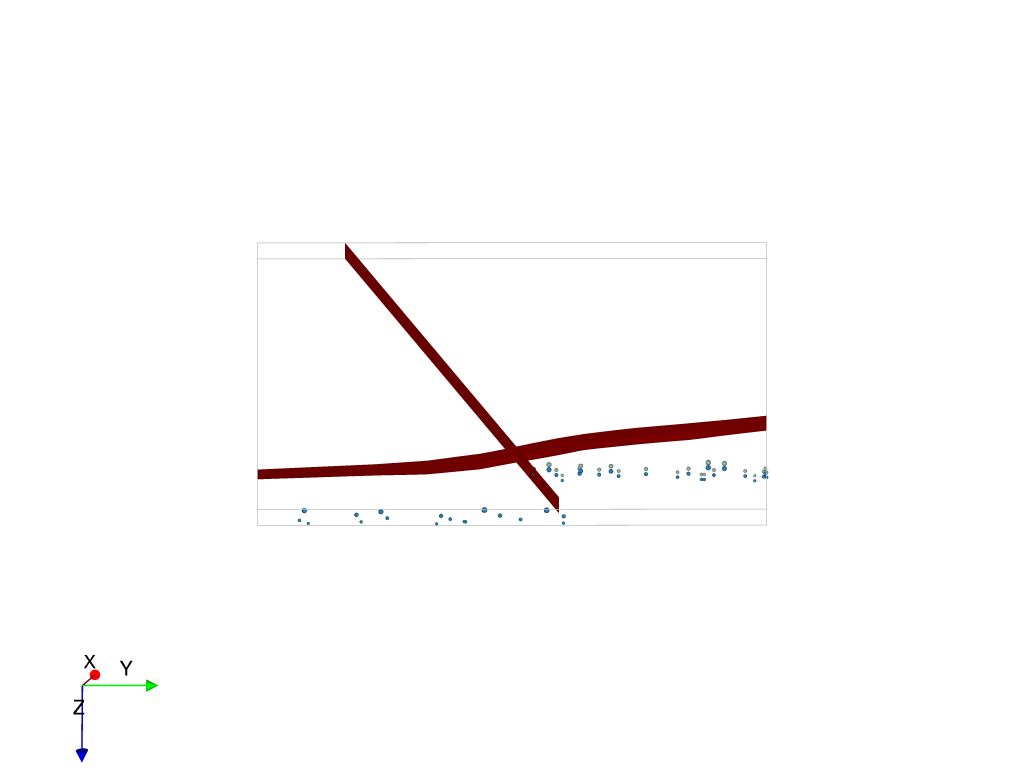

In [13]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati['feature'],isovalue=0)
viewer.add_isosurface(fault['feature'][0],isovalue=0)
viewer.add_data(strati['feature'])
viewer.rotate([0.019632680341601372, 88.20027923583984, -89.94925689697266])#lv.rotatex(90)
#viewer.lv.rotatey(90)
viewer.display()

In [14]:
viewer.lv['xyzrotate']

[0.019573355093598366, 88.20038604736328, -89.94937896728516]

In [13]:
import emcee

In [19]:
def log_prior(theta):
    displacement = theta
    mu = 0
    sigma = 600
    return np.log(1.0/(np.sqrt(2*np.pi)*sigma))-0.5*(displacement-mu)**2/sigma**2

In [20]:
model = GeologicalModel(bb[0,:],bb[1,:],reuse_supports=True)
model.set_model_data(data)
def log_likelihood(theta):
    displacement = theta
    print("displacement: {}".format(displacement))
    fault = model.create_and_add_fault('fault',
                                       displacement,
                                       nelements=2000,
                                       steps=4,
                                       interpolatortype='PLI',
                                      buffer=0.3,
                                       solver='pyamg'
                                      )
    strati = model.create_and_add_foliation('strati',
                                            nelements=10000,
                                            interpolatortype='PLI',
                                            cgw=0.1,
                                            solver='pyamg',
                                            buffer=0.5
                                           )
#     plt.hist(strati['feature'].evaluate_value_misfit())
    n = strati['feature'].interpolator.get_value_constraints()[:,:3].shape[0]
    sigma2 = 10
    log_like = -(n/2)*np.log(2*np.pi) - (n/2)*np.log(sigma2)
    log_like-= (1/(2*sigma2))*np.sum(np.abs(strati['feature'].evaluate_value_misfit()))
    
#     sigma2 = strati['feature'].evaluate_value(strati['feature'].interpolator.get_value_constraints()[:,:3]) ** 2 
#     log_like = -0.5 * np.sum((strati['feature'].evaluate_value_misfit()) ** 2 / sigma2 + np.log(sigma2))
    print("log likelihood {}".format(log_like))
    print("missfit {}".format(np.sum(strati['feature'].evaluate_value_misfit())))
    return log_like                         


In [21]:
def log_probability(theta):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta)

In [22]:
import emcee
start = np.array([-1000])
pos = start + 1e2 * np.random.randn(5, 1)
nwalkers, ndim = pos.shape

print(pos)

[[-1073.99456804]
 [-1147.71370702]
 [ -899.34784922]
 [ -926.82085066]
 [ -958.79416661]]


In [20]:
print(nwalkers,ndim)

5 1


In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
sampler.run_mcmc(pos, 50, progress=True);

In [ ]:
%%snakeviz
log_likelihood(500)

In [23]:
# %%snakeviz
disp = np.arange(-2000,2000,100)#[-1000,-750,-500,-250,0,250,500,750,1000]
logli = []
for d in disp:
    logli.append(log_likelihood(d))
#log_likelihood(-500)

displacement: -2000
log likelihood -166.98073969571672
missfit -14.224491998414086
displacement: -1900
log likelihood -166.8760816821672
missfit -13.599589877841346
displacement: -1800
log likelihood -166.76638633892998
missfit -12.983322338324832
displacement: -1700
log likelihood -166.51502658901012
missfit -12.253757070941987
displacement: -1600
log likelihood -166.4245432765058
missfit -11.563418046736576
displacement: -1500
log likelihood -166.36912736996862
missfit -10.95681819988311
displacement: -1400
log likelihood -166.32679025390672
missfit -10.463755278006078
displacement: -1300
log likelihood -166.27614906667426
missfit -9.736189130526192
displacement: -1200
log likelihood -166.2269844425021
missfit -9.083521505958437
displacement: -1100
log likelihood -166.17023770790706
missfit -8.331683308322269
displacement: -1000
log likelihood -166.11121416220868
missfit -7.62736815172752
displacement: -900
log likelihood -166.0523281300306
missfit -6.964050724233027
displacement: -8

c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1300


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1400


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1500


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1600


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1700


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1800


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan
displacement: 1900


c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:205: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:206: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\modelling\fault\fault_segment.py:212: RuntimeWarning: invalid value encountered in greater
  g[g_mag > 0.] /= g_mag[g_mag > 0, None]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.egg\LoopStructural\interpolators\structured_tetra.py:450: RuntimeWarning: invalid value encountered in floor_divide
  ix = ix // self.step_vector[None, 0]
c:\users\lgrose\.conda\envs\loop\lib\site-packages\loopstructural-0.0.0-py3.7-win-amd64.eg

log likelihood nan
missfit nan


In [ ]:
plt.plot(disp,logli)

In [ ]:
%%snakeviz 
np.linspace(0,10,10)